# RANDOM FOREST
## Exploring data
Data: Medical charges data from Kaggle: https://www.kaggle.com/mirichoi0218/insurance

We will design a model that will classify smokers and non-smokers using the medical data from Kaggle

In [2]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = 'C:/Users/Katia/Documents/Applied Data Analytics - course/Kaggle_medical_cost'
os.chdir(path)

In [3]:
# read csv data 

# Check README for where you can find the data
df = pd.read_csv('insurance.csv')

In [4]:
# Check variables
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check descriptive statistics of continuous variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Descriptive statistics show that insurance charges vary greatly from person to person, with an sdt value almost as high as the mean. We have to watch for outliers.

In [6]:
# Check if there are any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values. There is no need to fill missing data with means or discard rows.

### Explore continuous variables

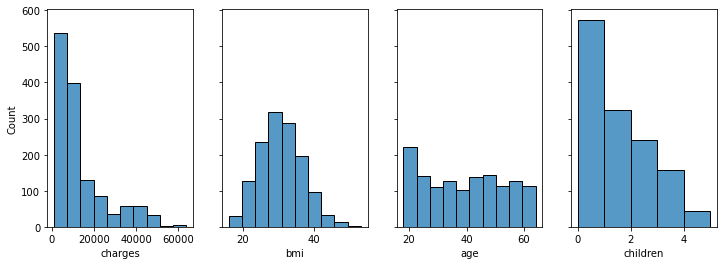

In [7]:
# Histogram

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize = (12,4))

sns.histplot(df['charges'], bins =10, ax = ax1)
sns.histplot(df['bmi'], bins =10, ax = ax2)
sns.histplot(df['age'], bins =10, ax = ax3)
sns.histplot(df['children'], bins =5, ax = ax4)

Insurance charges are skewed, as well as number of children. The range of ages is roughly even, and bmi seems normally distributed. Let's look at the relationship between the outcome variable (i.e., charges) and the other continuous variables.

### Explore categorical and continuous variables

Let's explore the relationship with the dependent variable (i.e., smoker status) and continuous variables.

Boxplots afford an exploration of how the data is distributed, the presence of outlier and differences across groups

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


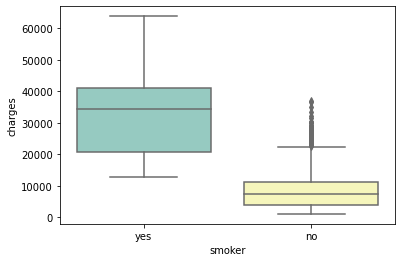

In [8]:
sns.boxplot(df['smoker'], df['charges'], palette="Set3") #palette set3 reduce transparency

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


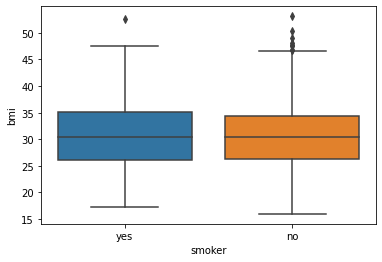

In [9]:
sns.boxplot(df['smoker'], df['bmi']) 

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


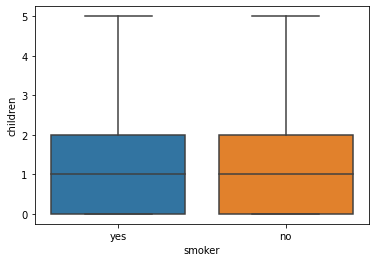

In [10]:
sns.boxplot(df['smoker'], df['children'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


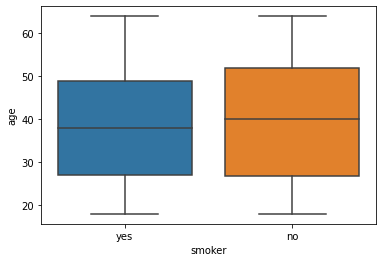

In [11]:
sns.boxplot(df['smoker'], df['age'])

There seems to be a significant difference regarding insurance charges between the group of smokers and non-smokers (i.e., smokers pay much more of insurance charges). Number of children, age, and bmi do not seem to be different among both populations, but let's look at scatterplots. 

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


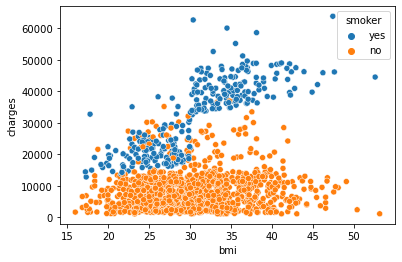

In [84]:
# Scatterplot discriminating groups

sns.scatterplot(df['bmi'], df['charges'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


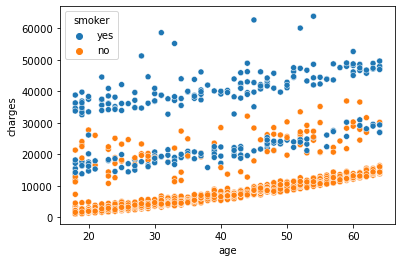

In [13]:
# Scatterplot discriminating groups

sns.scatterplot(df['age'], df['charges'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


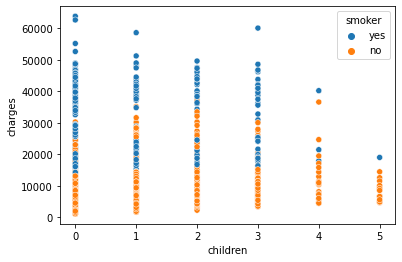

In [14]:
sns.scatterplot(df['children'], df['charges'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


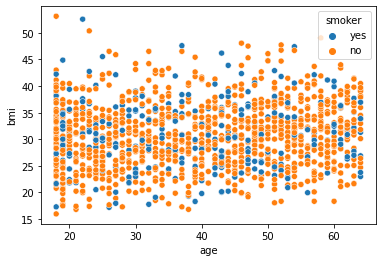

In [15]:
sns.scatterplot(df['age'], df['bmi'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


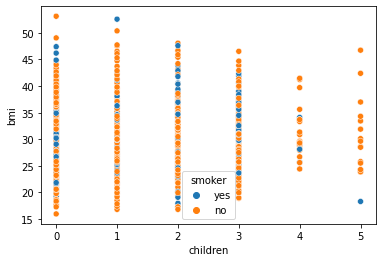

In [16]:
sns.scatterplot(df['children'], df['bmi'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


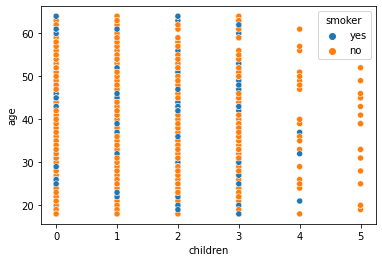

In [17]:
sns.scatterplot(df['children'], df['age'], hue= df['smoker'])

Even though boxplots suggested that there are no differences in bmi between the groups of smokers and non-smokers, the scatterplot above shows that for the smoker group, higher bmi results in higher charges. Age variation also seems more consistent among smokers. People with 4-5 children tend to be non-smokers, but the number of people in each category is very small compared to the other categories (i.e., people with no children, 1, 2, or 3 children), so this variable might not have a high impact.

### Distribution of categorical variables

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


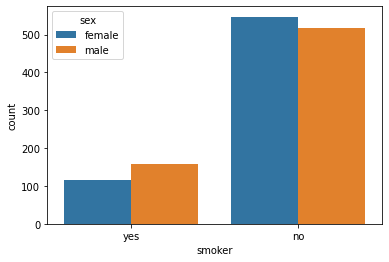

In [18]:
sns.countplot(df['smoker'], hue = df['sex'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


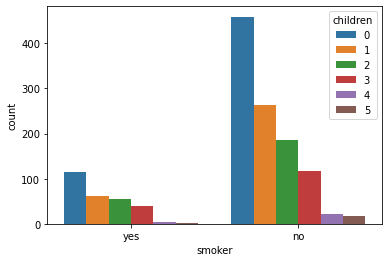

In [19]:
sns.countplot(df['smoker'], hue = df['children'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


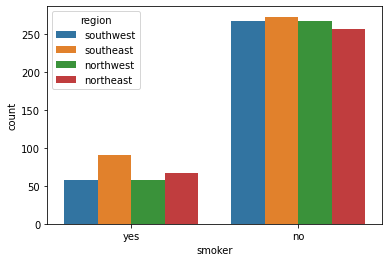

In [20]:
sns.countplot(df['smoker'], hue = df['region'])

There seems to be more male smokers and more smokers in the southwest. It may be worth exploring sex and region as predictor variables, although they do not seem to be strong indices.

## Feature engineering

We may want to explore a few new variables: a variable discriminating those with or without children and a categorical variable for age groups.

In [21]:
df.groupby('children').count()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


The number of people with 4 children and fewer is very low to warrant any reliable analysis; however, there seems to be enough people without children to create a dichotomous variable discriminating those with and without children.

In [22]:
children_status = []
for row in df['children']:
    if row == 0:
        children_status.append('no')
    else:
        children_status.append('yes')
df['children_status'] = children_status

In [23]:
age_groups = []
for age in df['age']:
    if age <= 30:
        age_groups.append('twenties_less')
    if age > 30 and age <= 40:
        age_groups.append('thirties')
    if age > 40 and age <= 50:
        age_groups.append('fourties')
    if age > 50:
        age_groups.append('fifties_more')
df['age_groups'] = age_groups

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


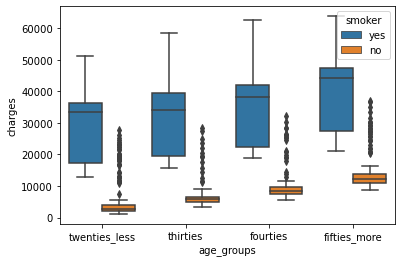

In [24]:
sns.boxplot(df['age_groups'], df['charges'],  hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


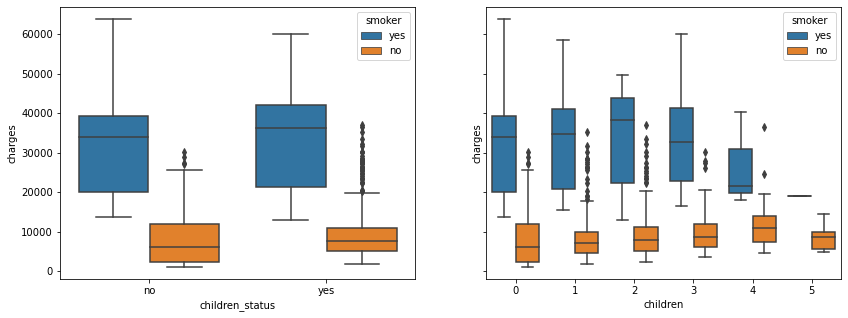

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (14,5))

sns.boxplot(df['children_status'], df['charges'],  hue= df['smoker'], ax = ax1)
sns.boxplot(df['children'], df['charges'],  hue= df['smoker'], ax = ax2)

The new features may not be more powerful predictors than original features, as suggested by boxplots.

## Removing outliers

In [26]:
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [27]:
for variable in ['charges', 'age','bmi', 'children']:
    outlier(variable)


Outlier caps for charges:
  --95p: 41181.8 / 67 values exceed that
  --3sd: 49586.9 / 7 values exceed that
  --99p: 48537.5 / 14 values exceed that

Outlier caps for age:
  --95p: 62.0 / 45 values exceed that
  --3sd: 81.3 / 0 values exceed that
  --99p: 64.0 / 0 values exceed that

Outlier caps for bmi:
  --95p: 41.1 / 67 values exceed that
  --3sd: 49.0 / 4 values exceed that
  --99p: 46.4 / 14 values exceed that

Outlier caps for children:
  --95p: 3.0 / 43 values exceed that
  --3sd: 4.7 / 18 values exceed that
  --99p: 5.0 / 0 values exceed that


In [28]:
# Remove outliers based on 99 quantile

df['charges_clean']= df['charges'].clip(upper=df['charges'].quantile(.99))
df['bmi_clean'] = df['bmi'].clip(upper=df['bmi'].quantile(.99))

In [29]:
df.describe()

,age,bmi,children,charges,charges_clean,bmi_clean
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,13220.715550,30.643352
std,14.049960,6.098187,1.205493,12110.011237,11941.304323,6.039053
min,18.000000,15.960000,0.000000,1121.873900,1121.873900,15.960000
25%,27.000000,26.296250,0.000000,4740.287150,4740.287150,26.296250
50%,39.000000,30.400000,1.000000,9382.033000,9382.033000,30.400000
75%,51.000000,34.693750,2.000000,16639.912515,16639.912515,34.693750
max,64.000000,53.130000,5.000000,63770.428010,48537.480726,46.407900


## Transform skewed variables

In [30]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


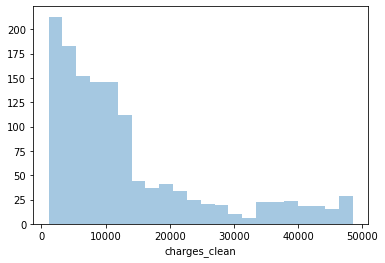

In [31]:
sns.distplot(df['charges_clean'], kde=False)

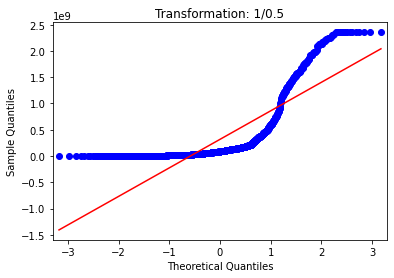

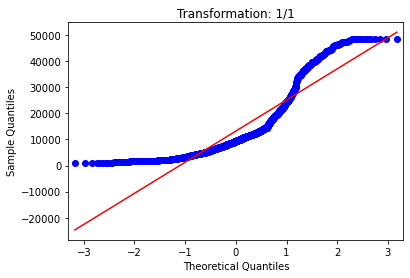

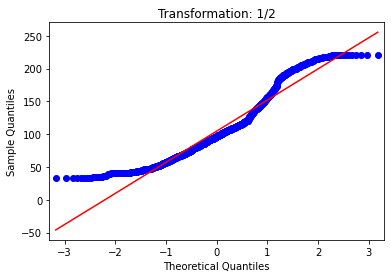

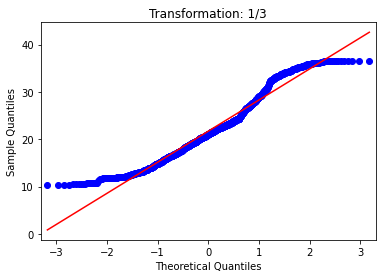

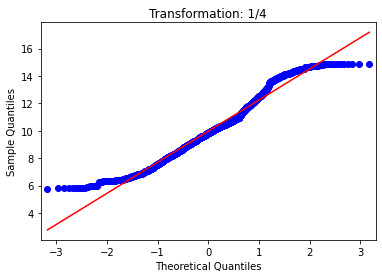

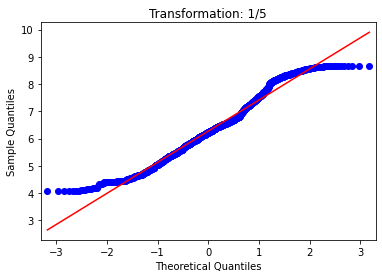

In [32]:
# Generate QQ plots to select best transformation
for i in [0.5, 1, 2, 3, 4, 5]:
    data = df['charges_clean']**(1/i)
    qqplot(data, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

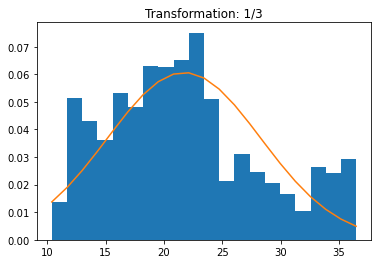

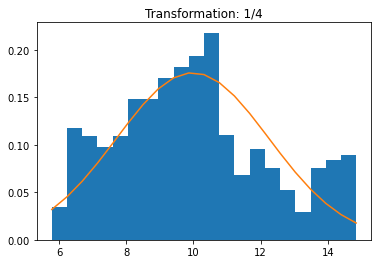

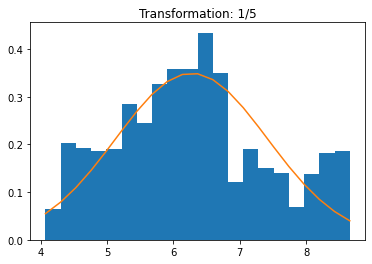

In [33]:
# Box-Cox transformation
for i in [3, 4, 5]:
    data = df['charges_clean']**(1/i)
    n, bins, patches = plt.hist(data, 20, density=True)
    mu = np.mean(data)
    sigma = np.std(data)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

Transformation 1/3 to 1/5 seem to generate similar distributions. Let's save transformation 1/5

In [34]:
# Create the new transformed variable
df['charges_clean_trans'] = df['charges_clean'].apply(lambda x: x**(1/5))
df.head()

,age,sex,bmi,children,smoker,region,charges,children_status,age_groups,charges_clean,bmi_clean,charges_clean_trans
0,19,female,27.900,0,yes,southwest,16884.92400,no,twenties_less,16884.92400,27.900,7.006479
1,18,male,33.770,1,no,southeast,1725.55230,yes,twenties_less,1725.55230,33.770,4.440027
2,28,male,33.000,3,no,southeast,4449.46200,yes,twenties_less,4449.46200,33.000,5.366134
3,33,male,22.705,0,no,northwest,21984.47061,no,thirties,21984.47061,22.705,7.386236
4,32,male,28.880,0,no,northwest,3866.85520,no,thirties,3866.85520,28.880,5.217610


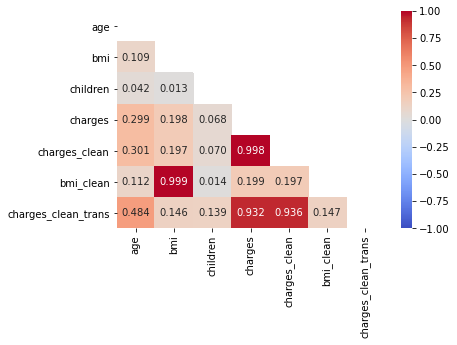

In [35]:
# Generate correlation matrix heat map
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


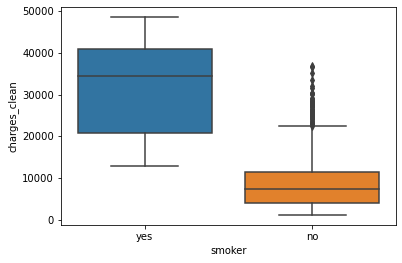

In [36]:
sns.boxplot(df['smoker'], df['charges_clean'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


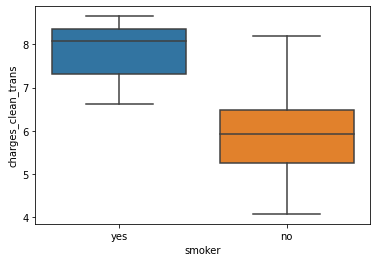

In [37]:
sns.boxplot(df['smoker'], df['charges_clean_trans'])

## Categorical variables into numeric

In [38]:
from sklearn.preprocessing import LabelEncoder

for variable in ['smoker', 'sex', 'age_groups', 'children_status', 'region']:
    le = LabelEncoder()
    df[variable + "_encoded"] = le.fit_transform(df[variable].astype(str))
    
df.head()

,age,sex,bmi,children,smoker,region,charges,children_status,age_groups,charges_clean,bmi_clean,charges_clean_trans,smoker_encoded,sex_encoded,age_groups_encoded,children_status_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,no,twenties_less,16884.92400,27.900,7.006479,1,0,3,0,3
1,18,male,33.770,1,no,southeast,1725.55230,yes,twenties_less,1725.55230,33.770,4.440027,0,1,3,1,2
2,28,male,33.000,3,no,southeast,4449.46200,yes,twenties_less,4449.46200,33.000,5.366134,0,1,3,1,2
3,33,male,22.705,0,no,northwest,21984.47061,no,thirties,21984.47061,22.705,7.386236,0,1,2,0,1
4,32,male,28.880,0,no,northwest,3866.85520,no,thirties,3866.85520,28.880,5.217610,0,1,2,0,1


## Create training and test sets

In [39]:
from sklearn.model_selection import train_test_split

df_nostr = df.drop(['sex', 'smoker', 'region', 'age_groups', 'children_status'], axis =1)
labels = df['smoker_encoded']

X_train, X_test, y_train, y_test = train_test_split(df_nostr, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,age,bmi,children,charges,charges_clean,bmi_clean,charges_clean_trans,smoker_encoded,sex_encoded,age_groups_encoded,children_status_encoded,region_encoded
25,59,27.72,3,14001.1338,14001.1338,27.72,6.748895,0,0,0,1,2
336,60,25.74,0,12142.5786,12142.5786,25.74,6.559371,0,1,0,0,2
47,28,34.77,0,3556.9223,3556.9223,34.77,5.131152,0,0,3,0,1
106,19,28.40,1,2331.5190,2331.5190,28.40,4.715500,0,0,3,1,3
1269,45,27.50,3,8615.3000,8615.3000,27.50,6.124267,0,1,1,1,3


In [40]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Standardize variables

In [41]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [42]:
# Scale the training, test, and validation sets
variables = X_train.columns

X_train[variables] = scaler.transform(X_train[variables])
X_val[variables] = scaler.transform(X_val[variables])
X_test[variables] = scaler.transform(X_test[variables])

X_train.head()

C:\Users\katia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,bmi,children,charges,charges_clean,bmi_clean,charges_clean_trans,smoker_encoded,sex_encoded,age_groups_encoded,children_status_encoded,region_encoded
25,1.388736,-0.453257,1.587098,0.058453,0.064819,-0.454341,0.411845,-0.514766,-1.017611,-1.309433,0.857864,0.481735
336,1.459036,-0.785388,-0.916875,-0.096001,-0.092404,-0.789341,0.244641,-0.514766,0.982693,-1.309433,-1.165686,0.481735
47,-0.790570,0.729328,-0.916875,-0.809505,-0.818701,0.738461,-1.015377,-0.514766,-1.017611,1.173227,-1.165686,-0.416757
106,-1.423272,-0.339192,-0.082217,-0.911341,-0.922363,-0.339291,-1.382077,-0.514766,-1.017611,1.173227,0.857864,1.380226
1269,0.404533,-0.490161,1.587098,-0.389132,-0.390792,-0.491563,-0.139221,-0.514766,0.982693,-0.481880,0.857864,1.380226


## Separate original, cleaned, all, and reduced variables

In [73]:
df_original = ['age', 'sex_encoded', 'bmi', 'children', 'charges', 'region_encoded']
df_cleaned = ['age', 'sex_encoded', 'bmi_clean', 'children', 'charges_clean','region_encoded']
df_complex = ['sex_encoded', 'bmi_clean', 'charges_clean_trans','region_encoded', 
              'children_status_encoded', 'age_groups_encoded']
# The variables which seem to have higher impact
df_reduced = ['age', 'bmi', 'charges_clean_trans']

In [74]:
X_train_original = X_train[df_original]
X_val_original = X_val[df_original]
X_test_original = X_test[df_original]

X_train_cleaned = X_train[df_cleaned]
X_val_cleaned = X_val[df_cleaned]
X_test_cleaned = X_test[df_cleaned]

X_train_complex = X_train[df_complex]
X_val_complex = X_val[df_complex]
X_test_complex = X_test[df_complex]

X_train_reduced = X_train[df_reduced]
X_val_reduced = X_val[df_reduced]
X_test_reduced = X_test[df_reduced]


## Build Models

Let's explore all datasets and later compare the best performing models

In [45]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Original data

In [52]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train_original, y_train.values.ravel())

print(cv)
print_results(cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [8, 16, 32, 64, 128, 256, 512]})
BEST PARAMS: {'max_depth': 4, 'n_estimators': 128}

0.858 (+/-0.095) for {'max_depth': 2, 'n_estimators': 8}
0.884 (+/-0.087) for {'max_depth': 2, 'n_estimators': 16}
0.898 (+/-0.082) for {'max_depth': 2, 'n_estimators': 32}
0.868 (+/-0.088) for {'max_depth': 2, 'n_estimators': 64}
0.915 (+/-0.052) for {'max_depth': 2, 'n_estimators': 128}
0.915 (+/-0.045) for {'max_depth': 2, 'n_estimators': 256}
0.92 (+/-0.058) for {'max_depth': 2, 'n_estimators': 512}
0.933 (+/-0.058) for {'max_depth': 4, 'n_estimators': 8}
0.936 (+/-0.079) for {'max_depth': 4, 'n_estimators': 16}
0.95 (+/-0.065) for {'max_depth': 4, 'n_estimators': 32}
0.955 (+/-0.041) for {'max_depth': 4, 'n_estimators': 64}
0.96 (+/-0.051) for {'max_depth': 4, 'n_estimators': 128}
0.951 (+/-0.055) for {'max_depth': 4, 'n_estimators': 256}
0.

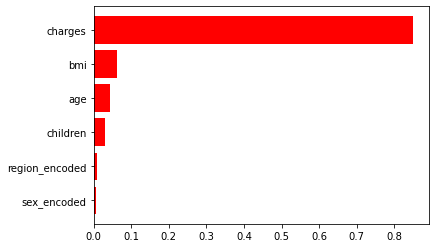

In [54]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X_train_original.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [56]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../mdl_original_variables.pkl')

['../mdl_original_variables.pkl']

### Clean data

In [57]:
cv.fit(X_train_cleaned, y_train.values.ravel())

print(cv)
print_results(cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [8, 16, 32, 64, 128, 256, 512]})
BEST PARAMS: {'max_depth': 16, 'n_estimators': 128}

0.874 (+/-0.086) for {'max_depth': 2, 'n_estimators': 8}
0.879 (+/-0.079) for {'max_depth': 2, 'n_estimators': 16}
0.899 (+/-0.147) for {'max_depth': 2, 'n_estimators': 32}
0.882 (+/-0.106) for {'max_depth': 2, 'n_estimators': 64}
0.916 (+/-0.065) for {'max_depth': 2, 'n_estimators': 128}
0.916 (+/-0.069) for {'max_depth': 2, 'n_estimators': 256}
0.914 (+/-0.066) for {'max_depth': 2, 'n_estimators': 512}
0.95 (+/-0.047) for {'max_depth': 4, 'n_estimators': 8}
0.945 (+/-0.071) for {'max_depth': 4, 'n_estimators': 16}
0.951 (+/-0.052) for {'max_depth': 4, 'n_estimators': 32}
0.953 (+/-0.052) for {'max_depth': 4, 'n_estimators': 64}
0.951 (+/-0.05) for {'max_depth': 4, 'n_estimators': 128}
0.955 (+/-0.053) for {'max_depth': 4, 'n_estimators': 256}


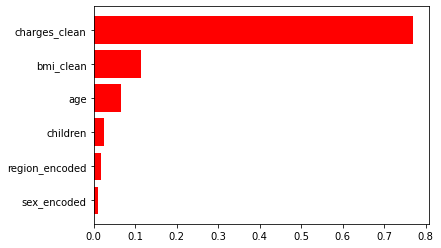

In [58]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X_train_cleaned.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [59]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../mdl_cleaned_variables.pkl')

['../mdl_cleaned_variables.pkl']

### Complex data (transformed)

In [60]:
cv.fit(X_train_complex, y_train.values.ravel())

print(cv)
print_results(cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [8, 16, 32, 64, 128, 256, 512]})
BEST PARAMS: {'max_depth': 8, 'n_estimators': 32}

0.849 (+/-0.106) for {'max_depth': 2, 'n_estimators': 8}
0.886 (+/-0.074) for {'max_depth': 2, 'n_estimators': 16}
0.899 (+/-0.073) for {'max_depth': 2, 'n_estimators': 32}
0.908 (+/-0.063) for {'max_depth': 2, 'n_estimators': 64}
0.911 (+/-0.082) for {'max_depth': 2, 'n_estimators': 128}
0.915 (+/-0.068) for {'max_depth': 2, 'n_estimators': 256}
0.903 (+/-0.055) for {'max_depth': 2, 'n_estimators': 512}
0.939 (+/-0.057) for {'max_depth': 4, 'n_estimators': 8}
0.951 (+/-0.035) for {'max_depth': 4, 'n_estimators': 16}
0.945 (+/-0.047) for {'max_depth': 4, 'n_estimators': 32}
0.958 (+/-0.044) for {'max_depth': 4, 'n_estimators': 64}
0.953 (+/-0.049) for {'max_depth': 4, 'n_estimators': 128}
0.958 (+/-0.051) for {'max_depth': 4, 'n_estimators': 256}


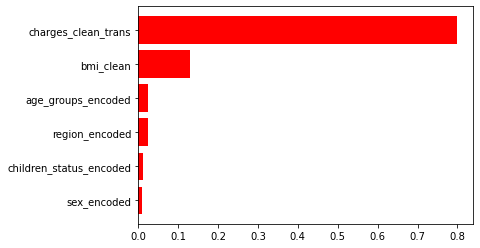

In [61]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X_train_complex.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [208]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../mdl_complex_variables.pkl')

['../mdl_complex_variables.pkl']

### Reduced data

In [75]:
cv.fit(X_train_reduced, y_train.values.ravel())

print(cv)
print_results(cv)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [8, 16, 32, 64, 128, 256, 512]})
BEST PARAMS: {'max_depth': None, 'n_estimators': 32}

0.877 (+/-0.093) for {'max_depth': 2, 'n_estimators': 8}
0.875 (+/-0.082) for {'max_depth': 2, 'n_estimators': 16}
0.873 (+/-0.088) for {'max_depth': 2, 'n_estimators': 32}
0.906 (+/-0.064) for {'max_depth': 2, 'n_estimators': 64}
0.884 (+/-0.105) for {'max_depth': 2, 'n_estimators': 128}
0.925 (+/-0.057) for {'max_depth': 2, 'n_estimators': 256}
0.928 (+/-0.053) for {'max_depth': 2, 'n_estimators': 512}
0.938 (+/-0.046) for {'max_depth': 4, 'n_estimators': 8}
0.943 (+/-0.048) for {'max_depth': 4, 'n_estimators': 16}
0.954 (+/-0.039) for {'max_depth': 4, 'n_estimators': 32}
0.951 (+/-0.055) for {'max_depth': 4, 'n_estimators': 64}
0.958 (+/-0.037) for {'max_depth': 4, 'n_estimators': 128}
0.959 (+/-0.048) for {'max_depth': 4, 'n_estimators': 25

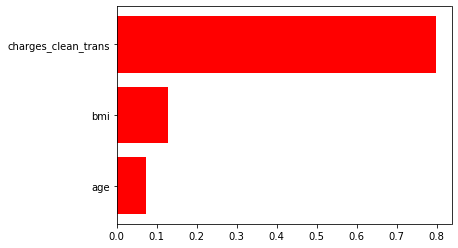

In [76]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
# add -1 to [i] to fix indexing error
plt.yticks(range(len(indices)), [X_train_reduced.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [77]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../mdl_reduced_variables.pkl')

['../mdl_reduced_variables.pkl']

## Compare models

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [79]:
# Read in models
models = {}

for mdl in ['original', 'cleaned', 'complex', 'reduced']:
    models[mdl] = joblib.load('../mdl_{}_variables.pkl'.format(mdl))

In [80]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [81]:
# Evaluate all of our models on the validation set
evaluate_model('Original Variables', models['original'], X_val_original, y_val)
evaluate_model('Cleaned Variables', models['cleaned'], X_val_cleaned, y_val)
evaluate_model('Complex Variables', models['complex'], X_val_complex, y_val)
evaluate_model('Reduced Variables', models['reduced'], X_val_reduced, y_val)

Original Variables -- 	Accuracy: 0.966 / Precision: 0.836 / Recall: 1.0 / Latency: 37.2ms
Cleaned Variables -- 	Accuracy: 0.974 / Precision: 0.868 / Recall: 1.0 / Latency: 29.2ms
Complex Variables -- 	Accuracy: 0.981 / Precision: 0.902 / Recall: 1.0 / Latency: 6.2ms
Reduced Variables -- 	Accuracy: 0.978 / Precision: 0.885 / Recall: 1.0 / Latency: 10.9ms


In [83]:
# Evaluate our final model on the test set
evaluate_model('Complex Variables', models['complex'], X_test_complex, y_test)

Complex Variables -- 	Accuracy: 0.959 / Precision: 0.877 / Recall: 0.95 / Latency: 12.4ms


The complex model is more accurate, precise, and faster than the other models. 